In [1]:
import tensorflow
tensorflow.keras.__version__

'2.2.4-tf'

# Введение в TensorBoard: фреймворк визуализации TensorFlow

В этом разделе мы познакомимся с TensorBoard, инструментом визуализации, основанным на использовании браузера, входящего в состав TensorFlow. Обратите внима-
ние: его можно использовать для исследования моделей Keras, только когда в качестве низкоуровневого механизма обработки тензоров Keras использует TensorFlow.
Основное назначение TensorBoard — помочь визуально наблюдать за происходящим внутри модели в процессе обучения. Отслеживая больший объем ин-
формации, нежели просто окончательные потери модели, вы сможете получить более четкое представление о том, что делает или чего не делает модель, и быстрее
добиться прогресса. TensorBoard открывает доступ к некоторым замечательным возможностям через самое обычное окно браузера:
* визуальный мониторинг метрик в ходе обучения;
* визуализация архитектуры модели;
* вывод гистограмм активаций и градиентов;
* исследование векторных представлений в трехмерном пространстве.

Рассмотрим эти возможности на простом примере. Мы обучим одномерную сверточную сеть на данных IMDB для решения задачи определения эмоциональной окраски отзывов.
Мы рассмотрим только первые 2000 самых часто используемых слов из словаря IMDB, чтобы
получить более простое визуальное изображение векторных представлений слов.

In [2]:
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
max_features = 2000
max_len = 500
#Количество слов, рассматриваемых как признаки
#Обрезка текста после этого количества слов (в числе
#max_features самых распространенных слов)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
model = tensorflow.keras.models.Sequential()
model.add(layers.Embedding(max_features, 128,
input_length=max_len,
name='embed'))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

17465344/17464789 [==============================] - 2s 0us/step


W0316 09:33:39.482855 140711761172224 deprecation.py:506] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/keras/initializers.py:113: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0316 09:33:39.493843 140711761172224 deprecation.py:506] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/init_ops.py:1257: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embed (Embedding)            (None, 500, 128)          256000    
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 98, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 291,937
Trainable params: 291,937
Non-trainable params: 0
__________________________________________________

Перед началом использования TensorBoard необходимо создать каталог, куда будут
сохраняться файлы журналов, генерируемые этим инструментом. Теперь запустим обучение, передав экземпляр TensorBoard в качестве обратного вызова. Этот обратный вызов будет записывать события на диск в указанный каталог.

In [9]:
import numpy as np
#Файлы журналов будут сохраняться в этом каталоге
#Запись гистограммы активаций в каждой эпохе
#Запись векторных представлений в каждой эпохе
callbacks = [tensorflow.keras.callbacks.TensorBoard(log_dir='/log',
                                         histogram_freq=1,
                                         embeddings_freq=1)]
history = model.fit(x_train, y_train,
epochs=5,
batch_size=128,
validation_split=0.2,
callbacks=callbacks)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
19968/20000 [============================>.] - ETA: 0s - loss: 0.1569 - acc: 0.9699

ValueError: To visualize embeddings, embeddings_data must be provided.

После этого можно запустить сервер TensorBoard из командной строки, указав, что
тот должен читать журналы, которые в настоящий момент записывает обратный
вызов. Утилита tensorboard должна автоматически установиться вместе с фрейм-
ворком TensorFlow:
`$ tensorboard --logdir=/log`

После этого можно запустить браузер, перейти по адресу http://localhost:$potr ($port - указанный вами при настройках порт) 
и  посмотреть, как протекает процесс обучения модели. 

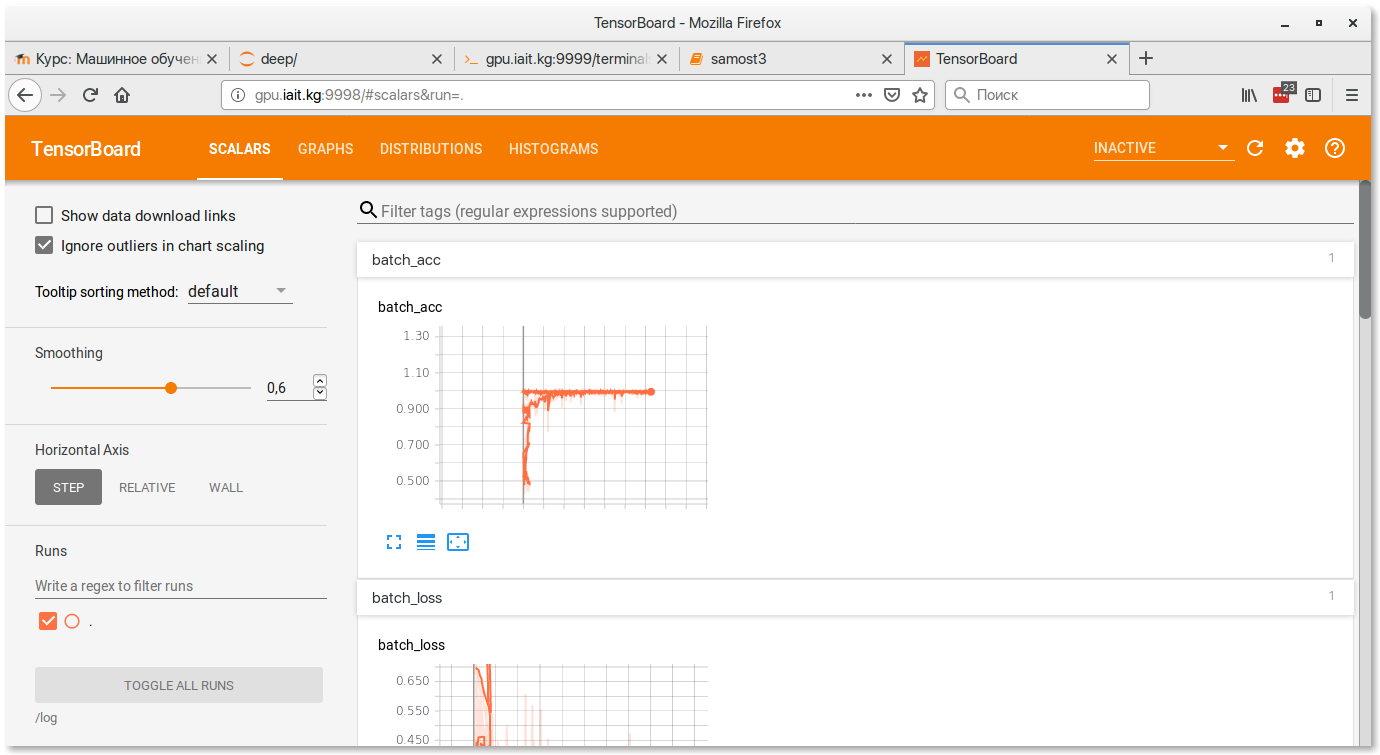

Помимо динамически обновляющихся графиков метрик, определяемых на этапах обучения
и проверки, можно, перейдя на вкладку Histograms (Гистограммы), найти превосходные гистограммы, отображающие значения активации, получаемые вашими
слоями.

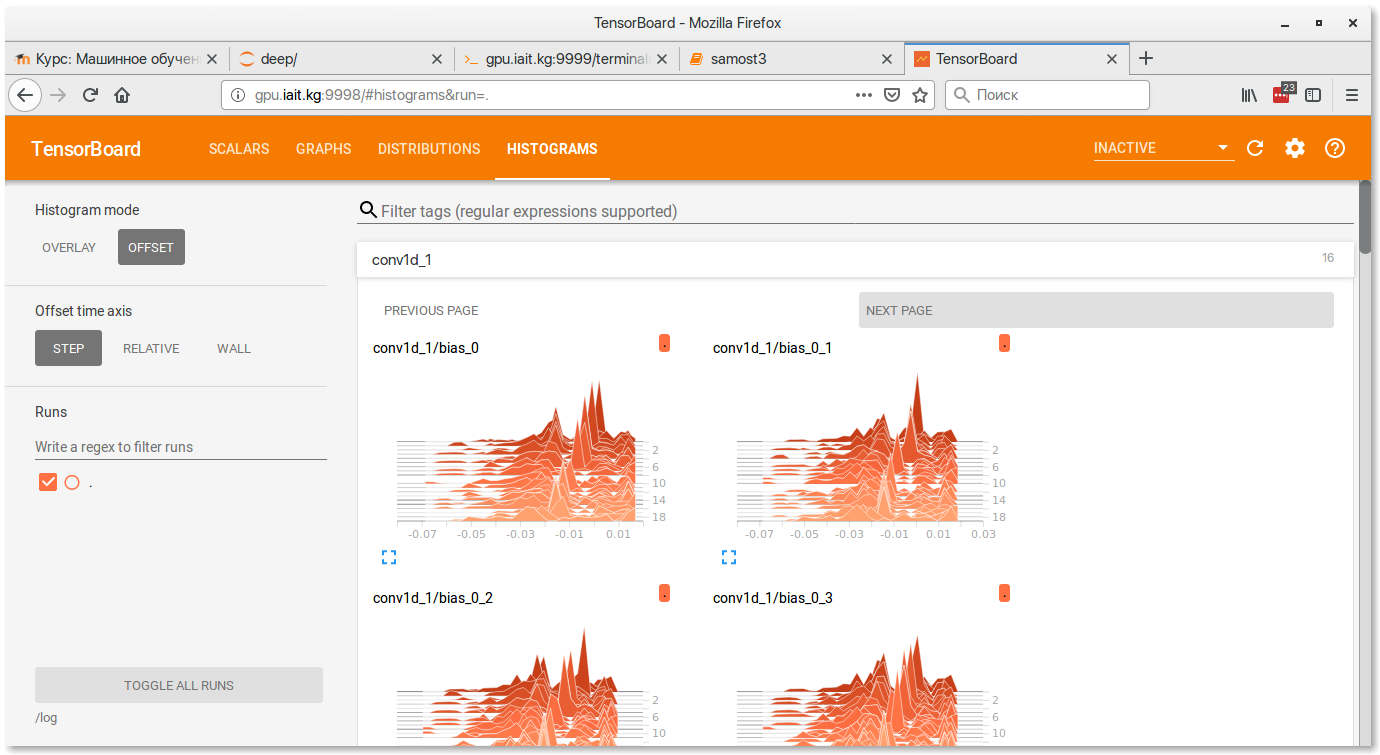

На вкладке Graphs (Диаграммы) изображены интерактивные диаграммы низкоуровневых операций, выполняемых фреймворком TensorFlow в ходе обучения
модели Keras. Как видите, в действительности за кулисами выполняется намного больше операций, чем можно было бы ожидать. Выраженная в конструкциях Keras, только что созданная модель выглядит просто — маленький стек из простых слоев, однако, чтобы заставить ее работать, за кулисами создается
очень сложный граф. Большая часть этого графа связана с организацией градиентного спуска. Такая разница в сложности между тем, что вы видите, и тем,
чем управляете, — главный мотив к использованию Keras для создания моделей вместо низкоуровневого TensorFlow. Keras делает процесс разработки моделей
до смешного простым.

Примечательно, что Keras поддерживает также другой, более ясный способ представления моделей в виде графов слоев вместо графов операций TensorFlow:
утилиту keras.utils.plot_model . Чтобы воспользоваться ею, нужно установить
библиотеки для Python pydot и  pydot-ng , а также библиотеку graphviz . Посмотрим,
что может эта утилита:

In [4]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

С помощью этой утилиты также можно отобразить информацию о форме слоев
в графе. Следующий пример создает изображение с топологией модели, передавая
утилите plot_model параметр show_shapes:

In [5]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')

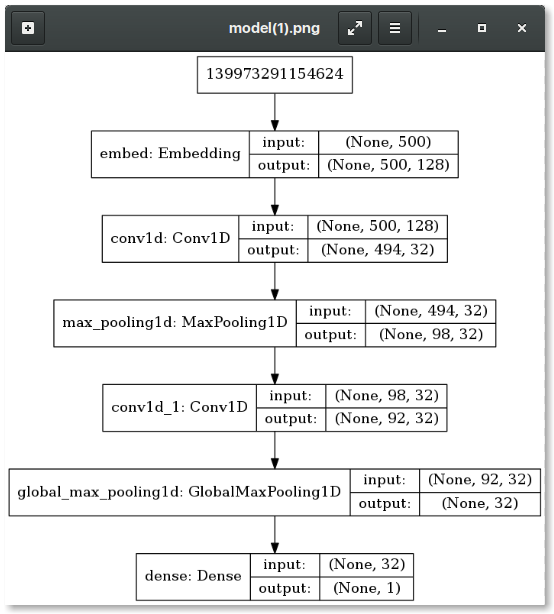

## Задание

Вкладка Embeddings (Векторные представления) позволяет рассмотреть местоположения и пространственные отношения 10 000 слов во входном словаре, выявленные начальным слоем Embedding . Поскольку векторное пространство имеет 128 измерений, TensorBoard автоматически снижает его размерность до двух
или трех, используя алгоритм уменьшения размерности по вашему выбору: метод
главных компонент (Principal Component Analysis, PCA) или метод нелинейного
снижения размерности и визуализации многомерных данных t-SNE (t-distributed
Stochastic Neighbor Embedding).  
Выведите облако точек, в котором
четко видно два кластера: слова с положительной и с отрицательной окраской.
Визуальное представление помогает сразу же заметить, что векторные пред ставления, получаемые с определенной целью, приводят к моделям, которые полностью характерны для решаемой задачи, — именно поэтому использование
предварительно обученных обобщенных векторных представлений слов редко
является хорошей идеей.

В строке

In [6]:
callbacks = [tensorflow.keras.callbacks.TensorBoard(log_dir='/log',
                                         histogram_freq=1,
                                         embeddings_freq=1, embeddings_data=np.array([]))]

необходимо изменить параметр embeddings_data. При необходимости используйте последнюю доступную версию Tensorflow.